#### <strong>第一次作品：主成分分析應用於群組資料之探討</strong>
學號：411178060

姓名：李俊翰
<hr>

 <font color=skyblue>作品目標</font>：。。。。。。 用一段文字描述你的作品目標。。。。。。
<hr>


<font color=red>提醒（只是提醒寫作的方式，無須置入作品中）</font>：每個題目的結構如下：
1. 描述題目（markdown）
1. 說明接下來的程式碼做些甚麼？（markdown）
1. 程式碼（code）
1. 程式執行結果（jupyter output）
1. 對結果的觀察與討論（markdown）

一個題目可能分好幾個細項執行，因此上述步驟 2 到步驟 5 將重複出現。以下舉例：

<hr>

第 1 題：

有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

(1) 匯入與觀察資料

In [71]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the wine dataset from sklearn
X, y = load_wine(return_X_y=True, as_frame=True)
labels = X.columns
# print sample size and number of features
print(f"Sample size: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
# print the number of classes
print(f"Number of classes: {len(np.unique(y))}")
# print the number of samples per class
print(f"Number of samples per class: {np.bincount(y)}")
# print number of missing values
print(f"Number of missing values: {X.isnull().sum().sum()}")
# print the information of the dataset
print(X.info())
# X.describe()

Sample size: 178
Number of features: 13
Number of classes: 3
Number of samples per class: [59 71 48]
Number of missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64

<hr>

(2) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

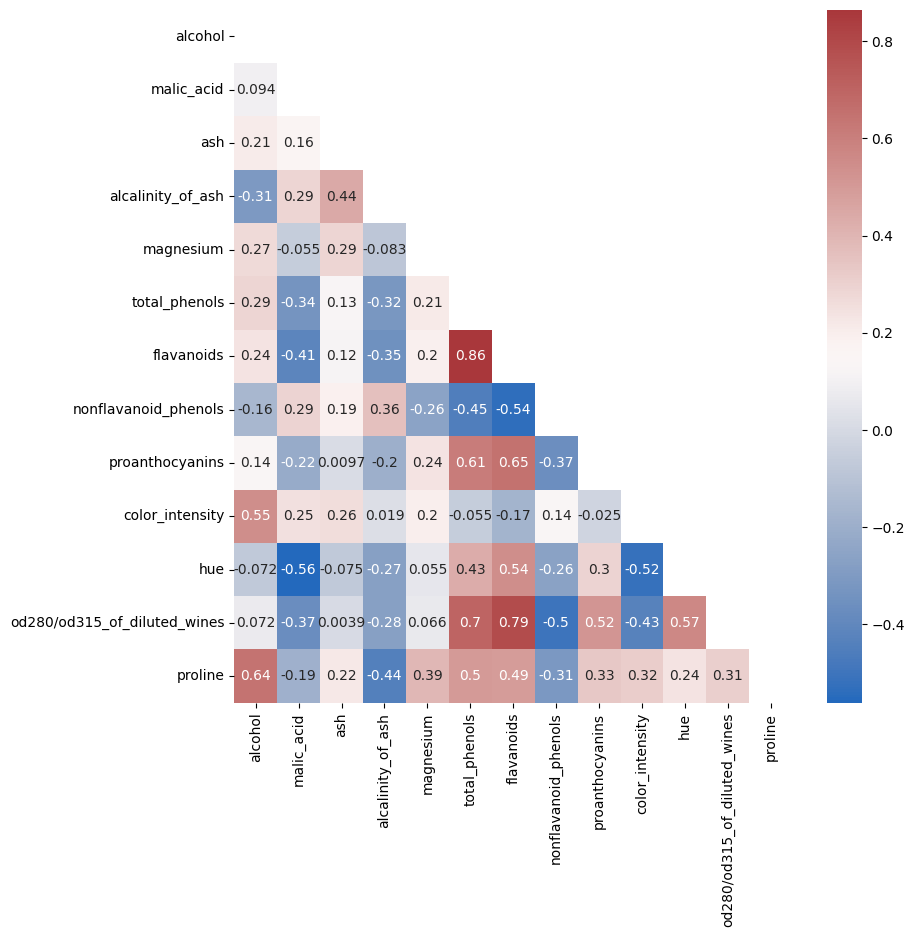

In [80]:
# Plot the correlation matrix
plt.figure(figsize = (9, 9))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
- 多組變數之間的相關係數較高，顯示這些變數具有高度相關性。

<hr>

(3) 繪製含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

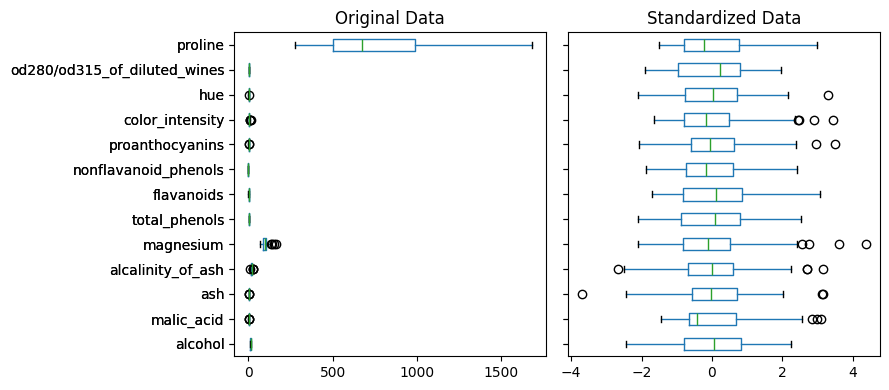

In [81]:
from sklearn.preprocessing import StandardScaler

# 標準化數據
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 創建共享 Y 軸的子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# 繪製原始數據的盒鬚圖
X.boxplot(vert=False, ax=ax1)
ax1.set_title("Original Data")
ax1.grid(False)

# 繪製標準化後的盒鬚圖
X_standardized.boxplot(vert=False, ax=ax2)
ax2.set_title("Standardized Data")
ax2.grid(False)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 原始資料中各變數的尺度差異過大，將變數進行標準化後，可以使變數間的尺度一致，具體表現為平均值為 0，變異數為 1。

<hr>

(4) 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

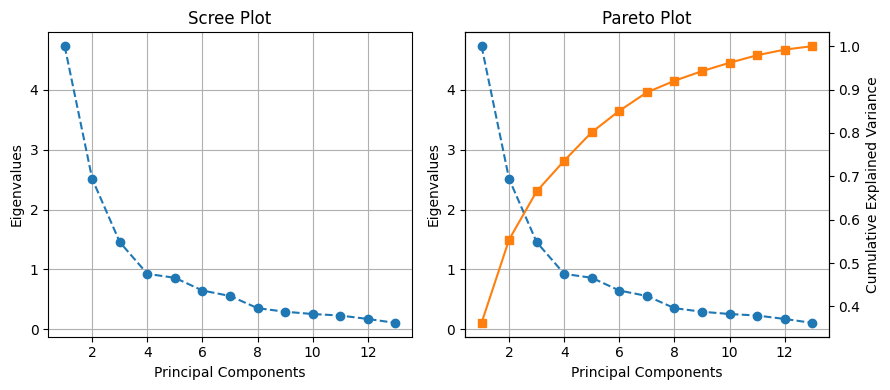

In [82]:
# PCA
from sklearn.decomposition import PCA

# 執行 PCA
pca = PCA()
pca.fit(X_standardized)

# 取得特徵值並按由大到小排序
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# 計算累積解釋變異數
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 創建子圖，並設置為 1 行 2 列的佈局
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# **Scree Plot** - 顯示特徵值
ax1.plot(range(1, len(eigenvalues) + 1), np.sort(eigenvalues)[::-1], marker='o', linestyle='--', color='#1f77b4')
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Eigenvalues')
ax1.grid(True)

# **Pareto Plot** - 顯示累積解釋變異數與特徵值
ax2.plot(range(1, len(eigenvalues) + 1), np.sort(eigenvalues)[::-1], marker='o', linestyle='--', color='#1f77b4', label='Eigenvalues')  # 特徵值
ax2.set_title('Pareto Plot')
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Eigenvalues')
ax2.grid(True)

# 創建第二個 y 軸來顯示累積解釋變異數
ax2_twin = ax2.twinx()
ax2_twin.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='s', linestyle='-', color='#ff7f0e', label='Cumulative Explained Variance')  # 累積解釋變異數
ax2_twin.set_ylabel('Cumulative Explained Variance')

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在四個主成分時，解釋變異數達到了約75%，而第五個主成分對解釋變異數的貢獻有限。
- 根據 肘部法則，我們通常會選擇四個主成分，因為它已經解釋了大部分的變異，並且進一步增加主成分對解釋變異的貢獻不大。

<hr>

(5) 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？

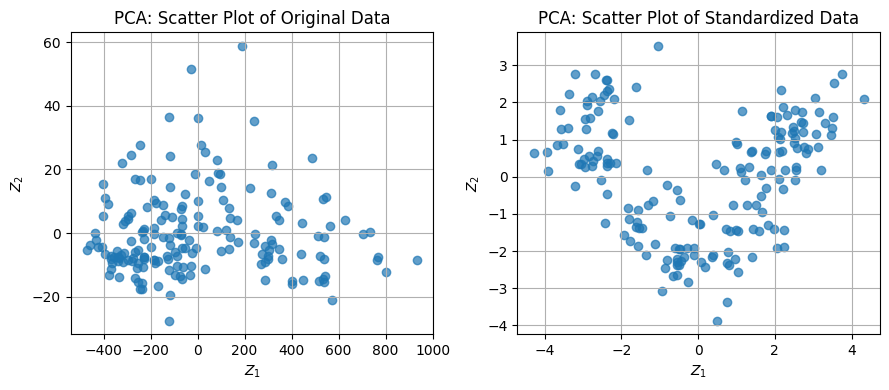

In [83]:
# 執行 PCA，選擇前兩個主成分

# **未標準化資料**
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)

# **標準化資料**
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca_standardized = PCA(n_components=2)
X_pca_standardized = pca_standardized.fit_transform(X_standardized)

# 創建兩張子圖，左側是未標準化，右側是標準化後的散布圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# **左圖：未標準化資料的散布圖，根據 Y 來區分顏色**
scatter1 = ax1.scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], alpha=0.7)
ax1.set_title('PCA: Scatter Plot of Original Data')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.grid(True)

# **右圖：標準化資料的散布圖，根據 Y 來區分顏色**
scatter2 = ax2.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], alpha=0.7)
ax2.set_title('PCA: Scatter Plot of Standardized Data')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.grid(True)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 左圖的分布可以看出兩個群組，而右圖的分布則顯示出三個群組，這顯示標準化後的資料能夠更清楚地揭示出資料中的群體結構。

<hr>

(6) 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

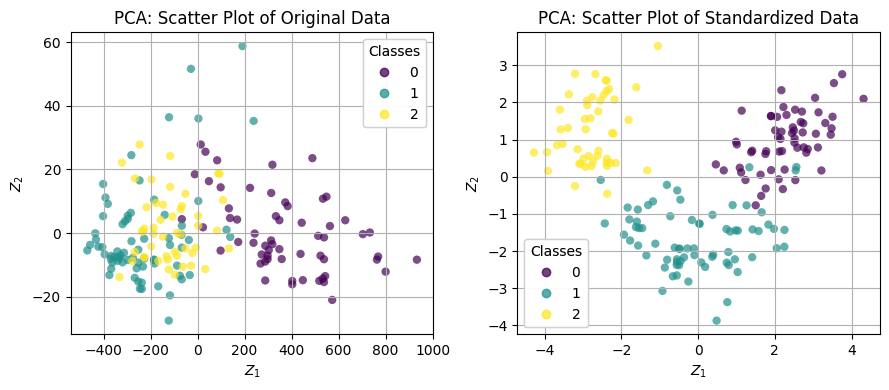

In [84]:
# 執行 PCA，選擇前兩個主成分

# **未標準化資料**
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)

# **標準化資料**
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca_standardized = PCA(n_components=2)
X_pca_standardized = pca_standardized.fit_transform(X_standardized)

# 創建兩張子圖，左側是未標準化，右側是標準化後的散布圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# **左圖：未標準化資料的散布圖，根據 Y 來區分顏色**
scatter1 = ax1.scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax1.set_title('PCA: Scatter Plot of Original Data')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.grid(True)
# 顯示圖例
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)

# **右圖：標準化資料的散布圖，根據 Y 來區分顏色**
scatter2 = ax2.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax2.set_title('PCA: Scatter Plot of Standardized Data')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.grid(True)
# 顯示圖例
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 左圖中類別1和類別2的區分不明顯，而右圖中各類別的資料點則有較明顯的區分，呈現出明確的群組結構，這顯示標準化後的資料有助於提升分群效果。

<hr>

(7) 如果採三個主成分，則可繪製如圖五與圖六的立體圖。觀察圖五、六是否比圖四（右）具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

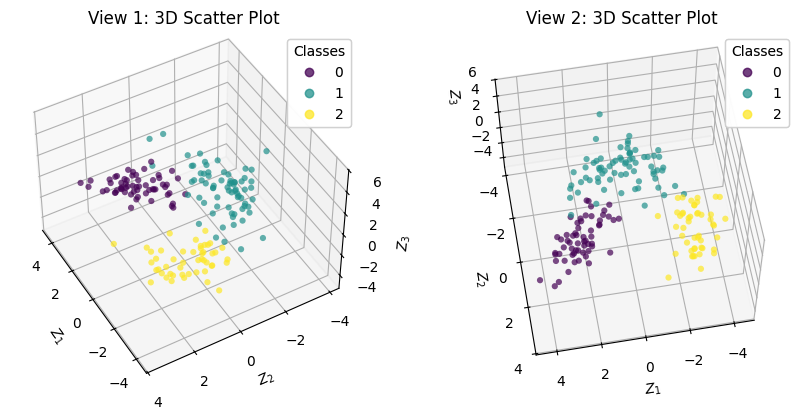

In [85]:
# 執行 PCA，選擇前三個主成分

# **標準化資料**
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca_standardized = PCA(n_components=3)
X_pca_standardized = pca_standardized.fit_transform(X_standardized)

# 創建兩張子圖
fig = plt.figure(figsize=(9, 4))

# **左圖：第一個視角**
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], X_pca_standardized[:, 2], marker='o', c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax1.set_title('View 1: 3D Scatter Plot')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.set_zlabel('$Z_3$')
ax1.view_init(elev=45, azim=150)  # 設定左圖的視角
# 顯示圖例
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)

# **右圖：第二個視角**
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca_standardized[:, 0], X_pca_standardized[:, 1], X_pca_standardized[:, 2], marker='o', c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax2.set_title('View 2: 3D Scatter Plot')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.set_zlabel('$Z_3$')
ax2.view_init(elev=60, azim=80)  # 設定右圖的視角
# 顯示圖例
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在兩張圖的視角下，顯示取三個主成分能有效區分三個類別的資料點，
- 使用兩個主成分時類別0和類別1部分重疊的問題，相對地，使用三個主成分改善此問題。

<hr>

(8) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數（即前兩個 eigenvector 的值），看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。

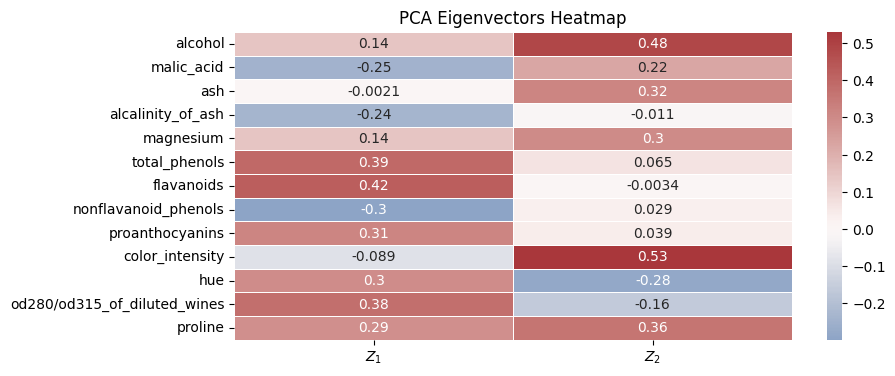

In [86]:
# 執行 PCA（使用標準化資料）
pca_standardized = PCA(n_components=2)
X_pca_standardized = pca_standardized.fit_transform(X_standardized)

# 取得特徵向量
feature_names = X.columns  # 原始變數名稱
eigenvectors = pd.DataFrame(pca_standardized.components_.T, index=feature_names, columns=["$Z_1$", "$Z_2$"])

# 繪製熱圖
plt.figure(figsize=(9, 4))
seaborn.heatmap(eigenvectors, annot=True, cmap="vlag", center=0, linewidths=0.5)

# 設定標題
plt.title("PCA Eigenvectors Heatmap")
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 根據第一主成分 $Z_1$ 的特徵向量組成，**total_phenols**、**flavanoids** 和 **od280/od315_of_diluted_wines** 的數值較高，顯示這些變數對第一主成分 $Z_1$ 的影響較大；相對而言，**ash** 和 **color_intensity** 的數值較低，表明它們對該主成分的貢獻較小。
- 在第二主成分 $Z_2$ 的特徵向量中，**alcohol**、**color_intensity** 和 **proline** 的數值較高，顯示這些變數對第二主成分 $Z_2$ 的重要性較大；相對而言，**alcalinity_of_ash**、**nonflavanoid_phenols** **flavanoids**、和 **proanthocyanins** 的數值較低，表示它們的影響較小。

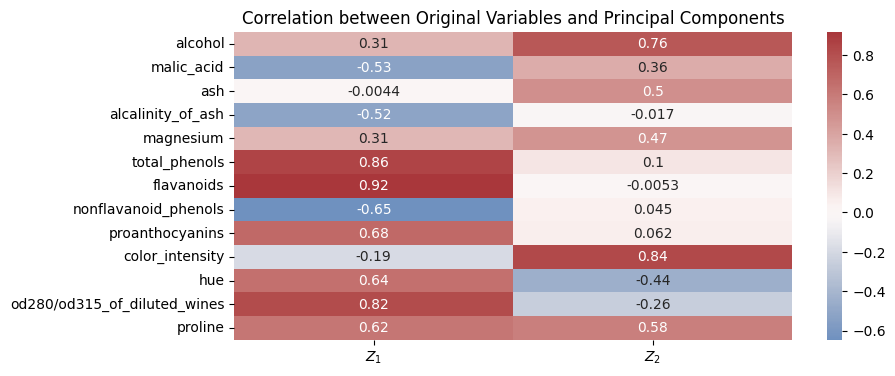

In [88]:
import numpy as np

# 計算原變數與主成分的相關係數
correlations = np.corrcoef(X_standardized.T, X_pca_standardized[:, :2].T)[:len(X.columns), len(X.columns):]

# 轉為 DataFrame 方便視覺化
correlation_df = pd.DataFrame(correlations, columns=['$Z_1$', '$Z_2$'], index=X.columns)

# 繪製熱圖
plt.figure(figsize=(9, 4))
seaborn.heatmap(correlation_df, annot=True, cmap='vlag', center=0)
plt.title("Correlation between Original Variables and Principal Components")
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 這張熱圖反映了各變數在主成分上的貢獻程度。數值較大（無論正負）表示該變數對該主成分的重要性較高。  
- 此熱圖的解讀結果與特徵向量的重要性分析一致，進一步驗證了各變數在不同主成分中的影響力。

<hr><hr>

第 2 題：

資料來自 NUMBEO 的 Quality of Life Index by City 2025。關於世界 263 個城市的生活品質排名，其中包含 8 個指標數字。

<hr>

(1) 資料預處理與觀察資料

In [90]:
# import the dataset
df = pd.read_excel('data/2025_city_quality.xlsx') 

labels = df.columns[3:]
D = df[labels]

# 將 Quality of Life Index 按分數高低分成三類 （3: HIGH, 2:MEDIUM, 1:LOW）
df['Quality of Life Index'] = df['Quality of Life Index'].apply(lambda x: 3 if x >= 200 else 2 if x >= 100 else 1)
y = df['Quality of Life Index']

# print sample size and number of features
print(f"Sample size: {D.shape[0]}")
print(f"Number of features: {D.shape[1]}")
# print the number of classes
print(f"Number of classes: {len(np.unique(y))}")
# print the number of samples per class
print(f"Number of samples per class: {np.bincount(y)}")
# print number of missing values
print(f"Number of missing values: {D.isnull().sum().sum()}")
# print the information of the dataset
print(D.info())

Sample size: 263
Number of features: 8
Number of classes: 3
Number of samples per class: [  0  30 214  19]
Number of missing values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Purchasing Power Index          263 non-null    float64
 1   Safety Index                    263 non-null    float64
 2   Health Care Index               263 non-null    float64
 3   Cost of Living Index            263 non-null    float64
 4   Property Price to Income Ratio  263 non-null    float64
 5   Traffic Commute Time Index      263 non-null    float64
 6   Pollution Index                 263 non-null    float64
 7   Climate Index                   263 non-null    float64
dtypes: float64(8)
memory usage: 16.6 KB
None


<hr>

(2) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

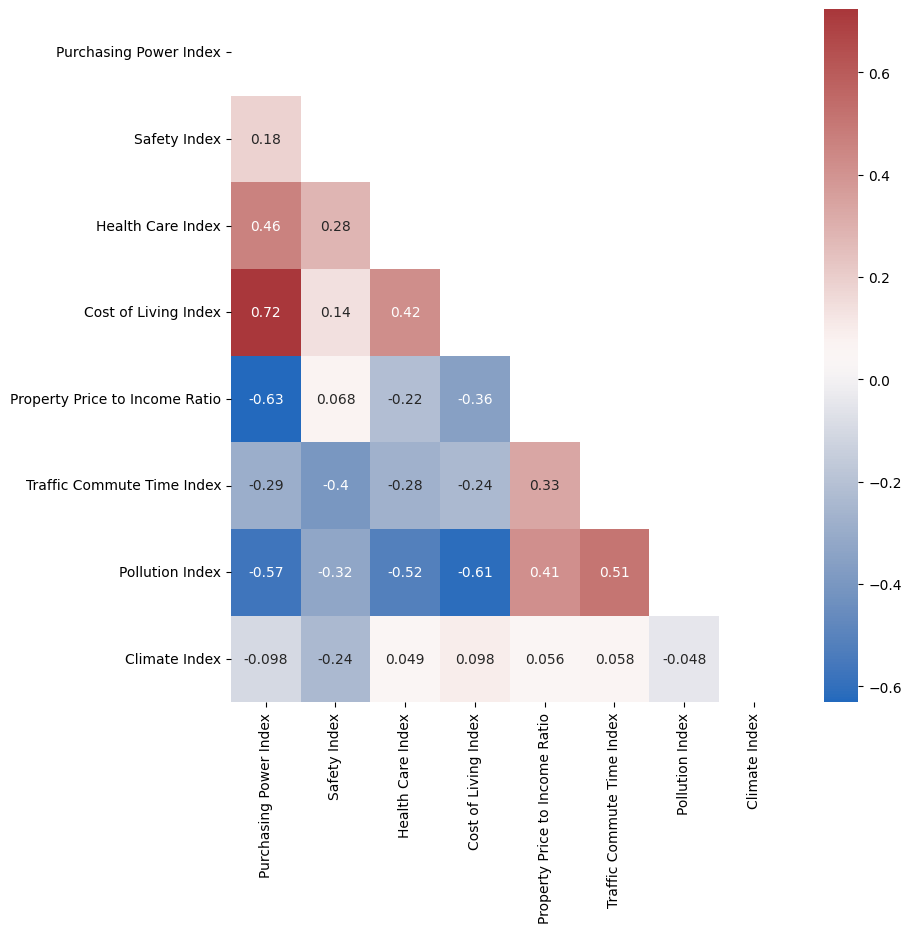

In [91]:
# Plot the correlation matrix
plt.figure(figsize = (9, 9))
R = D.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從相關係數圖可觀察到，多組變數的相關係數大於 0.3，顯示該資料存在變數相關性。

<hr>

(3) 繪製一張含每個量測變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考

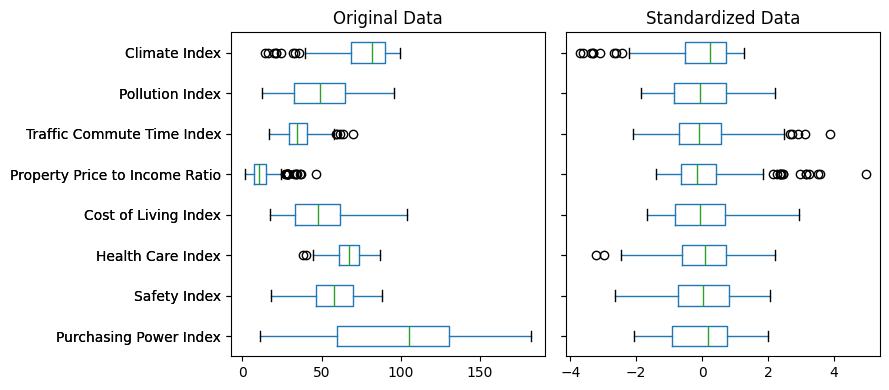

In [92]:
from sklearn.preprocessing import StandardScaler

# 標準化數據
scaler = StandardScaler()
D_standardized = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)

# 創建共享 Y 軸的子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# 繪製原始數據的盒鬚圖
D.boxplot(vert=False, ax=ax1)
ax1.set_title("Original Data")
ax1.grid(False)

# 繪製標準化後的盒鬚圖
D_standardized.boxplot(vert=False, ax=ax2)
ax2.set_title("Standardized Data")
ax2.grid(False)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從左圖可發現，原始數據的變異數差異較大；從右圖可見，標準化後的資料變異數較為穩定。

<hr>

(4) 進行主成分分析，繪製特徵值由大而小的分佈

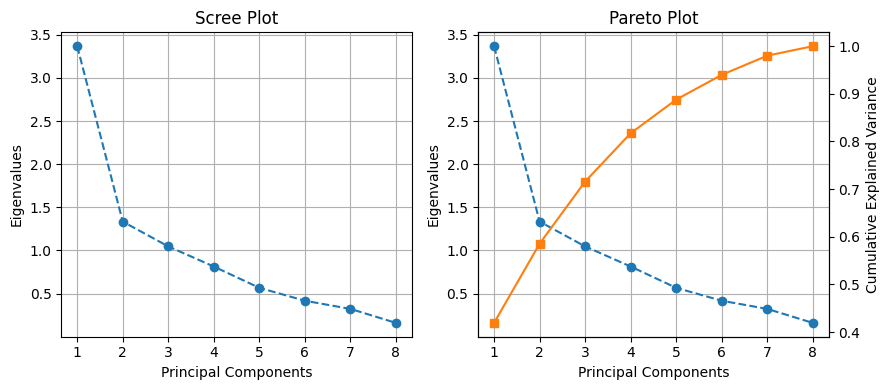

In [93]:
# PCA
from sklearn.decomposition import PCA

# 執行 PCA
pca = PCA()
pca.fit(D_standardized)

# 取得特徵值並按由大到小排序
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# 計算累積解釋變異數
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 創建子圖，並設置為 1 行 2 列的佈局
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# **Scree Plot** - 顯示特徵值
ax1.plot(range(1, len(eigenvalues) + 1), np.sort(eigenvalues)[::-1], marker='o', linestyle='--', color='#1f77b4')
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Eigenvalues')
ax1.grid(True)

# **Pareto Plot** - 顯示累積解釋變異數與特徵值
ax2.plot(range(1, len(eigenvalues) + 1), np.sort(eigenvalues)[::-1], marker='o', linestyle='--', color='#1f77b4', label='Eigenvalues')  # 特徵值
ax2.set_title('Pareto Plot')
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Eigenvalues')
ax2.grid(True)

# 創建第二個 y 軸來顯示累積解釋變異數
ax2_twin = ax2.twinx()
ax2_twin.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='s', linestyle='-', color='#ff7f0e', label='Cumulative Explained Variance')  # 累積解釋變異數
ax2_twin.set_ylabel('Cumulative Explained Variance')

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 兩張圖顯示每個主成分對整體變異數的貢獻。右圖展示各主成分的特徵值，即其貢獻的變異數，左圖則額外提供每個主成分的累積解釋變異百分比。
- 根據特徵值大於 1 的準則，選取 3 個主成分，累積解釋約 70% 的總變異。

<hr>

(5) 每筆資料都有標籤值（label），代表生活品質的高低（3: HIGH, 2:MEDIUM, 1:LOW）。假設先不看這項標籤。利用主成分分析取得前兩項成分（Z_1 與 Z_2），並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出三個群組？

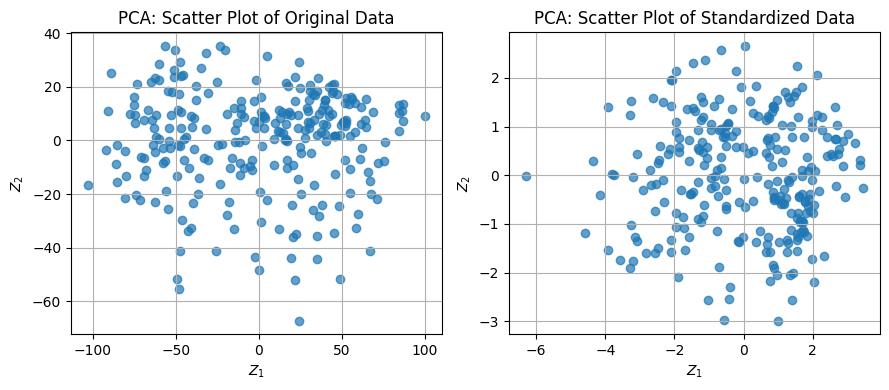

In [94]:
# 執行 PCA，選擇前兩個主成分

# **未標準化資料**
pca_raw = PCA(n_components=2)
D_pca_raw = pca_raw.fit_transform(D)

# **標準化資料**
scaler = StandardScaler()
D_standardized = scaler.fit_transform(D)
pca_standardized = PCA(n_components=2)
D_pca_standardized = pca_standardized.fit_transform(D_standardized)

# 創建兩張子圖，左側是未標準化，右側是標準化後的散布圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# **左圖：未標準化資料的散布圖，根據 Y 來區分顏色**
scatter1 = ax1.scatter(D_pca_raw[:, 0], D_pca_raw[:, 1], alpha=0.7)
ax1.set_title('PCA: Scatter Plot of Original Data')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.grid(True)

# **右圖：標準化資料的散布圖，根據 Y 來區分顏色**
scatter2 = ax2.scatter(D_pca_standardized[:, 0], D_pca_standardized[:, 1], alpha=0.7)
ax2.set_title('PCA: Scatter Plot of Standardized Data')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.grid(True)

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 上方兩張圖中的數據點過於集中，導致群組之間的區別不明顯，難以有效辨識不同類別。

<hr>

(6) 再依據每筆資料的標籤，在散佈圖上塗上不同顏色。

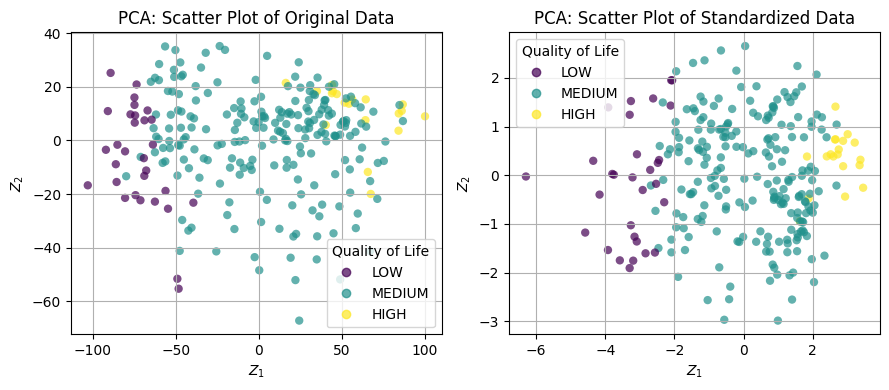

In [98]:
import matplotlib.pyplot as plt

# 創建兩張子圖，左側是未標準化，右側是標準化後的散布圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# 定義圖例標籤對應的字典
legend_labels = {"1": "LOW", "2": "MEDIUM", "3": "HIGH"}

# **左圖：未標準化資料的散布圖**
scatter1 = ax1.scatter(D_pca_raw[:, 0], D_pca_raw[:, 1], c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax1.set_title('PCA: Scatter Plot of Original Data')
ax1.set_xlabel('$Z_1$')
ax1.set_ylabel('$Z_2$')
ax1.grid(True)

# 取得圖例對應的 handles 和 labels
handles, labels = scatter1.legend_elements()
labels = [legend_labels[label.strip("$\\mathdefault{}")] for label in labels]  # 清理 LaTeX 字串
legend1 = ax1.legend(handles, labels, title="Quality of Life")

# **右圖：標準化資料的散布圖**
scatter2 = ax2.scatter(D_pca_standardized[:, 0], D_pca_standardized[:, 1], c=y, cmap='viridis', edgecolor='none', alpha=0.7)
ax2.set_title('PCA: Scatter Plot of Standardized Data')
ax2.set_xlabel('$Z_1$')
ax2.set_ylabel('$Z_2$')
ax2.grid(True)

# 取得圖例對應的 handles 和 labels
handles, labels = scatter2.legend_elements()
labels = [legend_labels[label.strip("$\\mathdefault{}")] for label in labels]  # 清理 LaTeX 字串
legend2 = ax2.legend(handles, labels, title="Quality of Life")

# 顯示圖形
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 將資料點依標籤著色後，可清楚區分三個群組。  
- 標準化後的資料相比未標準化的資料，能更明確地區分三個群組。  
- 生活品質較高的城市，其第一主成分分數相對較高。

<hr>

(7) 從 $Z_1$ 與 $Z_2$ 的散佈圖進一步推敲，也許需要加入 $Z_3$ 才能更有效區分群組，又或許去除 $Z_2$ 僅取 $Z_1$ 也能達到不錯的分類效果。請提出你的看法。

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 如第六小題的右圖所示，取兩個主成分可有效區分三個群組。然而，資料點在 $Z_2$ 軸上高度重疊，顯示第二主成分對群組的區分能力較弱。  
- 透過第一主成分即可清楚區分群組，且其數值越高，代表生活品質越高。

<hr>

(8) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數（即前兩個 eigenvector 的值），看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。

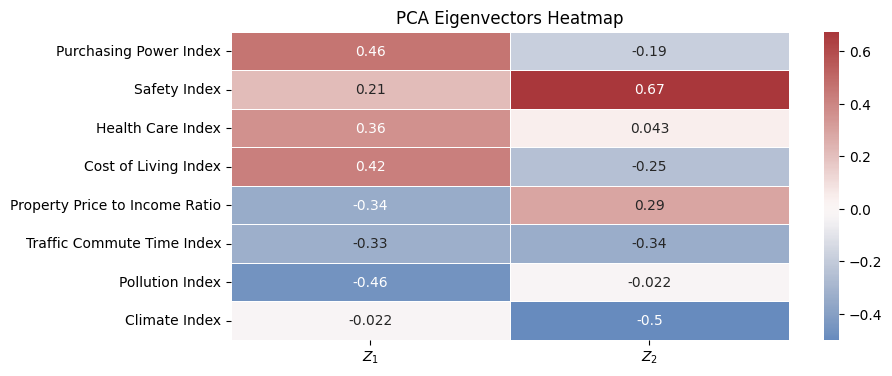

In [102]:
# 取得特徵向量
pca_standardized = PCA(n_components=2)
D_pca_standardized = pca_standardized.fit_transform(D_standardized)
feature_names = D.columns  # 原始變數名稱
eigenvectors = pd.DataFrame(pca_standardized.components_.T, index=feature_names, columns=["$Z_1$", "$Z_2$"])

# 繪製熱圖
plt.figure(figsize=(9, 4))
seaborn.heatmap(eigenvectors, annot=True, cmap='vlag', center=0, linewidths=0.5)

# 設定標題
plt.title("PCA Eigenvectors Heatmap")
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 根據第一主成分 $Z_1$ 的特徵向量組成，**Purchasing Power Index**、**Cost of Living Index** 和 **Pollution Index** 的數值較大，顯示這些指標對第一主成分 $Z_1$ 貢獻較大；相對而言，**Climate Index** 的數值最低，顯示其對第一主成分 $Z_1$ 的貢獻最小。
  
- 根據第二主成分 $Z_2$ 的特徵向量組成，**Safety Index** 和 **Climate Index** 的數值較大，顯示這些指標對第二主成分 $Z_2$ 貢獻較大；相對而言，**Pollution Index** 和 **Health Care Index** 的數值最低，顯示其對第二主成分 $Z_2$ 的貢獻最小。

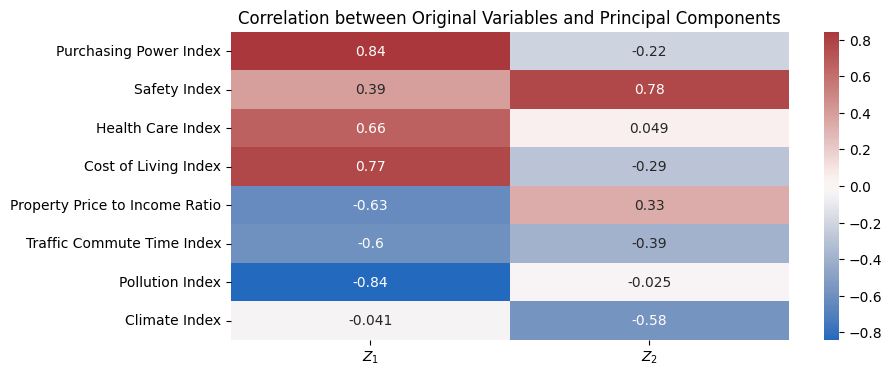

In [101]:
# 計算原變數與主成分的相關係數
correlations = np.corrcoef(D_standardized.T, D_pca_standardized[:, :2].T)[:len(D.columns), len(D.columns):]

# 轉為 DataFrame 方便視覺化
correlation_df = pd.DataFrame(correlations, columns=['$Z_1$', '$Z_2$'], index=D.columns)

# 繪製熱圖
plt.figure(figsize=(9, 4))
seaborn.heatmap(correlation_df, annot=True, cmap='vlag', center=0)
plt.title("Correlation between Original Variables and Principal Components")
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 這張熱圖反映了各變數在主成分上的貢獻程度。數值較大（無論正負）表示該變數對該主成分的重要性較高。  
- 此熱圖的解讀結果與特徵向量的重要性分析一致，進一步驗證了各變數在不同主成分中的影響力。